In [1]:
# 01_limpieza_columnas.ipynb

import pandas as pd

# Cargar el archivo CSV tratado
df = pd.read_csv('data/telecomx_data.csv')

# Ver las primeras filas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [9]:
print(df.columns)


Index(['Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [10]:
df.to_csv('data/telecomx_data_limpio.csv', index=False)


In [11]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [12]:
df_encoded.to_csv('data/telecomx_data_encoded.csv', index=False)


In [13]:
# Ver distribución de la variable Churn
print(df['Churn'].value_counts())

# Ver proporciones relativas
print(df['Churn'].value_counts(normalize=True))


Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [20]:
print(df.dtypes)


Churn       object
customer    object
phone       object
internet    object
account     object
dtype: object


In [21]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [22]:
correlaciones = df_encoded.corr()


In [4]:
import pandas as pd

df = pd.read_csv('data/telecomx_data.csv')


In [5]:
df_reducido = df.drop(['customer', 'phone', 'account'], axis=1)


In [6]:
df_encoded = pd.get_dummies(df_reducido, drop_first=True)


In [7]:
correlaciones = df_encoded.corr()


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt

# 0) Ubicación y verificación
print("Working dir:", os.getcwd())
os.makedirs("data", exist_ok=True)
os.makedirs("figures", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

# 1) Localizar automáticamente el CSV en ./data
csvs = glob.glob("data/*.csv")
if not csvs:
    raise FileNotFoundError("No encontré archivos .csv en la carpeta 'data/'. "
                            "Mete tu dataset en esa carpeta o indica la ruta exacta.")
csv_path = csvs[0]  # si hay varios, elige el correcto manualmente
print("Usando archivo:", csv_path)

# 2) Cargar dataset original
df = pd.read_csv(csv_path)

# 3) Crear df_reducido 

cols_drop = []  # p.ej.: ["customerID", "unnamed", "notas"]
df_reducido = df.drop(columns=[c for c in cols_drop if c in df.columns], errors="ignore")

# 4) Definir nombre de la variable objetivo (AJUSTA AL TUYO)
target_col = "Churn"  # ej: "Churn", "Canceled", "churn"
if target_col not in df_reducido.columns:
    raise KeyError(f"No encontré la columna objetivo '{target_col}' en el dataset. "
                   f"Columnas disponibles: {list(df_reducido.columns)[:15]}...")

# Si el target es texto Yes/No, mapeamos
if df_reducido[target_col].dtype == "O":
    df_reducido[target_col] = df_reducido[target_col].str.strip().str.title().map({"Yes":1, "No":0}).fillna(df_reducido[target_col])

# 5) One-hot encoding (todo numérico)
df_encoded = pd.get_dummies(df_reducido, drop_first=True, dtype=int)

# Limpiar infinitos/nulos
X = df_encoded.replace([np.inf, -np.inf], np.nan).fillna(0)

print("Shape df_encoded:", X.shape)

# 6) Matriz de correlación y correlación con el target
correlaciones = X.corr(numeric_only=True)
if target_col not in correlaciones.columns:
    raise KeyError(f"Después del encoding, no aparece '{target_col}' en la matriz. "
                   "Revisa que no lo hayas eliminado o renombrado.")

corr_target = correlaciones[target_col].sort_values(ascending=False)

# 7) Guardar salidas
correlaciones.to_csv("outputs/corr_matrix.csv")
corr_target.to_csv("outputs/corr_with_target.csv")
print("✓ Guardado outputs/corr_matrix.csv y outputs/corr_with_target.csv")

# 8) Gráficos
plt.figure(figsize=(12,10))
plt.imshow(correlaciones, aspect='auto')
plt.title("Matriz de correlación (Pearson)")
plt.colorbar()
plt.tight_layout()
plt.savefig("figures/corr_heatmap.png", dpi=150)
plt.close()

topN = 15
top_feats = corr_target.abs().sort_values(ascending=False).head(topN).index
sub = correlaciones.loc[top_feats, top_feats]
plt.figure(figsize=(8,6))
plt.imshow(sub, aspect='auto')
plt.xticks(range(len(top_feats)), top_feats, rotation=90)
plt.yticks(range(len(top_feats)), top_feats)
plt.title(f"Top {topN} correlaciones (abs) con {target_col}")
plt.colorbar()
plt.tight_layout()
plt.savefig("figures/corr_topN_heatmap.png", dpi=150)
plt.close()
print("✓ Guardado figures/corr_heatmap.png y figures/corr_topN_heatmap.png")

# 9) Vista rápida de resultados
print("\nTop 20 variables por |r| con el target:")
print(corr_target.abs().sort_values(ascending=False).head(20))


Working dir: /Users/Aracely/Desktop/telecomx-churn-analysis-parte2
Usando archivo: data/telecomx_data.csv


/var/folders/7q/zrybffg57h31156bt30slz600000gp/T/ipykernel_48817/4217840600.py:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reducido[target_col] = df_reducido[target_col].str.strip().str.title().map({"Yes":1, "No":0}).fillna(df_reducido[target_col])


Shape df_encoded: (7267, 15217)


In [4]:

import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Cargar dataset ---
csv_path = "data/telecomx_data.csv"   # tu archivo
df = pd.read_csv(csv_path)

# --- Definir target ---
target_col = "Churn"  

# Estandarizar target 
y = df[target_col]
if y.dtype == "O":
    y = y.astype(str).str.strip().str.title().map({"Yes": 1, "No": 0})
y = y.fillna(0).astype(int)



drop_base = ["customerID"]  
df_reducido = df.drop(columns=[c for c in drop_base if c in df.columns], errors="ignore")

# --- Detectar categóricas de alta cardinalidad y filtrarlas ---
cat_cols = [c for c in df_reducido.columns if df_reducido[c].dtype == "O" and c != target_col]
uniques = df_reducido[cat_cols].nunique().sort_values(ascending=False)
THRESH = 30  # umbral de cardinalidad
high_card = uniques[uniques > THRESH].index.tolist()


df_tmp = df_reducido.drop(columns=high_card, errors="ignore")


if target_col in df_tmp.columns:
    df_tmp = df_tmp.drop(columns=[target_col])

X = pd.get_dummies(df_tmp, drop_first=True, dtype=int)
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

print("Shapes -> X:", X.shape, "| y:", y.shape)


corr_target = X.corrwith(y).sort_values(key=lambda s: s.abs(), ascending=False)

# --- Guardar salidas ---
os.makedirs("outputs", exist_ok=True)
os.makedirs("figures", exist_ok=True)
corr_target.to_csv("outputs/corr_with_target.csv", index=True)
print("✓ outputs/corr_with_target.csv guardado")

# --- Heatmap pequeño con Top N ---
topN = 15
top_feats = corr_target.abs().head(topN).index.tolist()
sub = pd.concat([X[top_feats], y.rename(target_col)], axis=1).corr()

plt.figure(figsize=(8,6))
plt.imshow(sub, aspect='auto')
plt.xticks(range(len(sub.columns)), sub.columns, rotation=90)
plt.yticks(range(len(sub.index)), sub.index)
plt.title(f"Top {topN} correlaciones (abs) con {target_col}")
plt.colorbar()
plt.tight_layout()
plt.savefig("figures/corr_topN_heatmap.png", dpi=150)
plt.close()
print("✓ figures/corr_topN_heatmap.png guardado")

# --- Vista rápida ---
print("\nTop 20 |r| con el target:")
print(corr_target.abs().head(20))


Shapes -> X: (7267, 2) | y: (7267,)
✓ outputs/corr_with_target.csv guardado
✓ figures/corr_topN_heatmap.png guardado

Top 20 |r| con el target:
phone_{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}    0.039343
phone_{'PhoneService': 'Yes', 'MultipleLines': 'No'}     0.031430
dtype: float64


In [3]:
import pandas as pd

# Cargar el dataset original (ajusta el nombre al tuyo dentro de /data)
df = pd.read_csv("data/telecomx_data.csv")  # cámbialo si el archivo se llama distinto

# Mira todas las columnas
print(df.columns.tolist())

# Buscar columnas que contengan "churn" o "cancel"
[col for col in df.columns if "churn" in col.lower() or "cancel" in col.lower()]



['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


['Churn']

In [8]:
import ast

# Convertir el string de diccionario a dict real (para la primera fila)
ejemplo_account = ast.literal_eval(df["account"].iloc[0])
print(ejemplo_account.keys())
print(ejemplo_account)




dict_keys(['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges'])
{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}


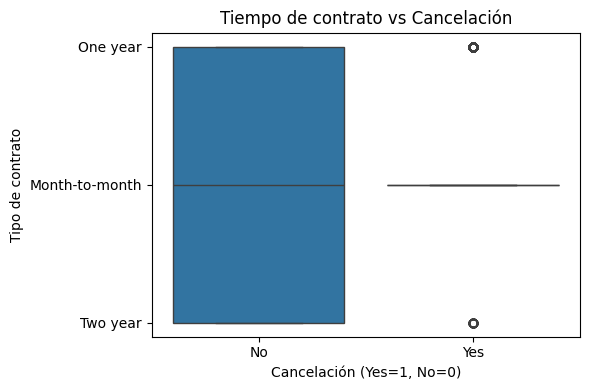

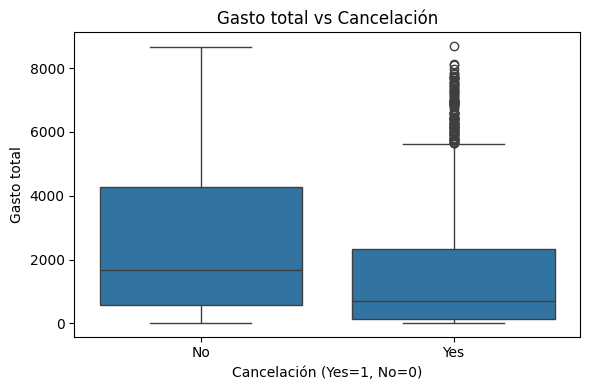

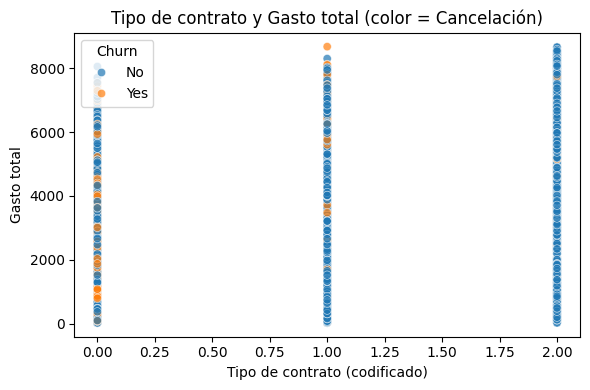

In [9]:
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

target_col = "Churn"

# --- Convertir strings JSON a diccionarios reales ---
df["account"] = df["account"].apply(ast.literal_eval)

# --- Extraer columnas necesarias ---
df["Contract"] = df["account"].apply(lambda x: x.get("Contract"))
df["TotalCharges"] = df["account"].apply(lambda x: x.get("Charges", {}).get("Total"))

# Convertir TotalCharges a numérico
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# --- Boxplot: Tiempo de contrato vs Cancelación ---
plt.figure(figsize=(6,4))
sns.boxplot(x=target_col, y="Contract", data=df)
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Cancelación (Yes=1, No=0)")
plt.ylabel("Tipo de contrato")
plt.tight_layout()
plt.savefig("figures/boxplot_contract_churn.png", dpi=150)
plt.show()

# --- Boxplot: Gasto total vs Cancelación ---
plt.figure(figsize=(6,4))
sns.boxplot(x=target_col, y="TotalCharges", data=df)
plt.title("Gasto total vs Cancelación")
plt.xlabel("Cancelación (Yes=1, No=0)")
plt.ylabel("Gasto total")
plt.tight_layout()
plt.savefig("figures/boxplot_totalcharges_churn.png", dpi=150)
plt.show()


df["Contract_num"] = df["Contract"].astype("category").cat.codes

plt.figure(figsize=(6,4))
sns.scatterplot(x="Contract_num", y="TotalCharges", hue=target_col, data=df, alpha=0.7)
plt.title("Tipo de contrato y Gasto total (color = Cancelación)")
plt.xlabel("Tipo de contrato (codificado)")
plt.ylabel("Gasto total")
plt.tight_layout()
plt.savefig("figures/scatter_contract_totalcharges_churn.png", dpi=150)
plt.show()


In [11]:
import sklearn
print(sklearn.__version__)


1.7.1


In [13]:
print(df[target_col].value_counts(dropna=False))
print("Nulos en Churn:", df[target_col].isna().sum())


Churn
No     5174
Yes    1869
NaN     224
Name: count, dtype: int64
Nulos en Churn: 224


In [14]:
target_col = "Churn"

y_raw = df[target_col].astype(str).str.strip().str.title()  # " yes  " -> "Yes"
y = y_raw.map({"Yes":1, "No":0})

# Filtrar filas con y nulo
mask = y.notna()
removed = (~mask).sum()
if removed > 0:
    print(f"Filas eliminadas por Churn nulo/ inválido: {removed}")

X = df.drop(columns=[target_col, "customerID"])
X = X.loc[mask].reset_index(drop=True)
y = y.loc[mask].astype(int).reset_index(drop=True)


Filas eliminadas por Churn nulo/ inválido: 224


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Proporción Churn en train:", y_train.mean())
print("Proporción Churn en test:", y_test.mean())


Tamaño X_train: (4930, 7)
Tamaño X_test: (2113, 7)
Proporción Churn en train: 0.2653144016227181
Proporción Churn en test: 0.26549929010885


In [18]:
# === 0) Setup ===
import pandas as pd, numpy as np, ast
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix

target_col = "Churn"

#  Aplastar columnas JSON 
def is_dict_like(x):
    return isinstance(x, (dict,)) or (isinstance(x, str) and x.strip().startswith("{") and x.strip().endswith("}"))

def flatten_json_column(df, col):
    # Convierte strings a dict y normaliza
    tmp = df[col].apply(lambda v: ast.literal_eval(v) if isinstance(v, str) and is_dict_like(v) else v)
    # Si quedan dicts, expandir
    if tmp.apply(lambda v: isinstance(v, dict)).any():
        norm = pd.json_normalize(tmp)
        norm.columns = [f"{col}.{c}" for c in norm.columns]
        df = pd.concat([df.drop(columns=[col]), norm], axis=1)
    return df

for col in ["customer", "phone", "internet", "account"]:
    if col in df.columns:
        df = flatten_json_column(df, col)

# Extra: si 'account.Charges.Total' viene como texto, convertir a número
for c in ["account.Charges.Total", "account.Charges.Monthly"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Estandarizar y binarizar el target
y_raw = df[target_col].astype(str).str.strip().str.title()
y = y_raw.map({"Yes": 1, "No": 0})
mask = y.notna()
df = df.loc[mask].reset_index(drop=True)
y = y.loc[mask].astype(int).reset_index(drop=True)

#  Definir X y eliminar columnas no útiles
drop_cols = [target_col, "customerID"]
X = df.drop(columns=[c for c in drop_cols if c in df.columns])

# Split (70/30) — 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

#  Preprocesamiento por tipo ===
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat", cat_pipeline, cat_cols),
    ],
    remainder="drop"
)

#  Modelo con normalización:
log_reg = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])
log_reg.fit(X_train, y_train)
pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, pred_lr)
prec_lr, rec_lr, f1_lr, _ = precision_recall_fscore_support(y_test, pred_lr, average="binary", zero_division=0)

#  Modelo sin normalización: Random Forest ===
rf = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", RandomForestClassifier(n_estimators=300, random_state=42))
])
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
prec_rf, rec_rf, f1_rf, _ = precision_recall_fscore_support(y_test, pred_rf, average="binary", zero_division=0)

# === 5) Resultados comparados ===
print("\n=== Regresión Logística ===")
print("Accuracy:", round(acc_lr, 4), "| Precision:", round(prec_lr, 4), "| Recall:", round(rec_lr, 4), "| F1:", round(f1_lr, 4))
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr, zero_division=0))

print("\n=== Random Forest ===")
print("Accuracy:", round(acc_rf, 4), "| Precision:", round(prec_rf, 4), "| Recall:", round(rec_rf, 4), "| F1:", round(f1_rf, 4))
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf, zero_division=0))



=== Regresión Logística ===
Accuracy: 0.7345 | Precision: 0.5 | Recall: 0.8004 | F1: 0.6155
[[1103  449]
 [ 112  449]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1552
           1       0.50      0.80      0.62       561

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.71      2113
weighted avg       0.80      0.73      0.75      2113


=== Random Forest ===
Accuracy: 0.7842 | Precision: 0.6154 | Recall: 0.4991 | F1: 0.5512
[[1377  175]
 [ 281  280]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.50      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.78      2113



In [19]:
# === Evaluación de modelos 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

def evaluar_modelo(model, X_tr, y_tr, X_te, y_te, nombre):
    # Predicciones
    y_tr_pred = model.predict(X_tr)
    y_te_pred = model.predict(X_te)

    # Métricas
    acc_tr = accuracy_score(y_tr, y_tr_pred)
    acc_te = accuracy_score(y_te, y_te_pred)
    prec_te, rec_te, f1_te, _ = precision_recall_fscore_support(
        y_te, y_te_pred, average="binary", zero_division=0
    )
    cm = confusion_matrix(y_te, y_te_pred)

    # Reporte
    print(f"\n=== {nombre} ===")
    print(f"Accuracy (train): {acc_tr:.4f} | Accuracy (test): {acc_te:.4f}")
    print(f"Precision: {prec_te:.4f} | Recall: {rec_te:.4f} | F1: {f1_te:.4f}")
    print("Matriz de confusión:")
    print(cm)
    print("\nReporte de clasificación:")
    print(classification_report(y_te, y_te_pred, zero_division=0))

    # Diagnóstico simple de overfitting / underfitting
    gap = acc_tr - acc_te
    if gap > 0.05:
        diag = "Posible OVERFITTING (accuracy de train bastante mayor que test)."
    elif gap < -0.02:
        diag = "Posible UNDERFITTING (test > train; el modelo podría ser simple)."
    else:
        diag = "Sin señales fuertes de over/underfitting (train ≈ test)."
    print("Diagnóstico:", diag)

    return {"name": nombre, "acc": acc_te, "prec": prec_te, "rec": rec_te, "f1": f1_te}

# Evaluar ambos modelos
res_lr = evaluar_modelo(log_reg, X_train, y_train, X_test, y_test, "Regresión Logística")
res_rf = evaluar_modelo(rf, X_train, y_train, X_test, y_test, "Random Forest")

# Resumen comparativo 
print("\n=== Comparación rápida (conjunto de TEST) ===")
for r in [res_lr, res_rf]:
    print(f"{r['name']}: Acc={r['acc']:.4f} | Prec={r['prec']:.4f} | Rec={r['rec']:.4f} | F1={r['f1']:.4f}")



=== Regresión Logística ===
Accuracy (train): 0.7538 | Accuracy (test): 0.7345
Precision: 0.5000 | Recall: 0.8004 | F1: 0.6155
Matriz de confusión:
[[1103  449]
 [ 112  449]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1552
           1       0.50      0.80      0.62       561

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.71      2113
weighted avg       0.80      0.73      0.75      2113

Diagnóstico: Sin señales fuertes de over/underfitting (train ≈ test).

=== Random Forest ===
Accuracy (train): 0.9978 | Accuracy (test): 0.7842
Precision: 0.6154 | Recall: 0.4991 | F1: 0.5512
Matriz de confusión:
[[1377  175]
 [ 281  280]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.50      0.55       561

    accuracy                           

In [20]:
# === Importancia de variables: Regresión Logística y Random Forest ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Recuperar nombres de features después del ColumnTransformer
def get_feature_names(ct):
    names = []
    for name, trans, cols in ct.transformers_:
        if name == "remainder" and trans == "drop":
            continue
        if hasattr(trans, "named_steps"):
            # Pipeline (imputer, scaler/onehot, etc.)
            last = trans.named_steps.get("onehot", None)
            if last is not None and hasattr(last, "get_feature_names_out"):
                oh_names = last.get_feature_names_out(cols)
                names.extend(oh_names)
            else:
                # pipeline numérico
                names.extend(cols)
        else:
            # Transformador directo
            if hasattr(trans, "get_feature_names_out"):
                names.extend(trans.get_feature_names_out(cols))
            else:
                names.extend(cols)
    return np.array(names, dtype=object)

feature_names = get_feature_names(log_reg.named_steps["prep"])

# 2) Importancia – Regresión Logística 
lr_clf = log_reg.named_steps["clf"]
if lr_clf.coef_.ndim == 1:
    lr_coef = lr_clf.coef_
else:
    lr_coef = lr_clf.coef_[0]  # binario

imp_lr = pd.DataFrame({
    "feature": feature_names,
    "importance": np.abs(lr_coef).ravel(),
    "coef": lr_coef.ravel()
}).sort_values("importance", ascending=False)

# 3) Importancia – Random Forest
rf_clf = rf.named_steps["clf"]
imp_rf = pd.DataFrame({
    "feature": feature_names,
    "importance": rf_clf.feature_importances_
}).sort_values("importance", ascending=False)

# 4) Guardar a disco
import os
os.makedirs("outputs", exist_ok=True)
os.makedirs("figures", exist_ok=True)
imp_lr.to_csv("outputs/importance_logistic.csv", index=False)
imp_rf.to_csv("outputs/importance_rf.csv", index=False)
print("✓ Guardado: outputs/importance_logistic.csv y outputs/importance_rf.csv")

# 5) Gráficos Top N
topN = 15

plt.figure(figsize=(8,6))
plt.barh(imp_lr.head(topN)["feature"][::-1], imp_lr.head(topN)["importance"][::-1])
plt.title(f"Top {topN} importancia (|coef|) – Regresión Logística")
plt.tight_layout()
plt.savefig("figures/importance_logistic_topN.png", dpi=150)
plt.close()

plt.figure(figsize=(8,6))
plt.barh(imp_rf.head(topN)["feature"][::-1], imp_rf.head(topN)["importance"][::-1])
plt.title(f"Top {topN} importancia – Random Forest")
plt.tight_layout()
plt.savefig("figures/importance_rf_topN.png", dpi=150)
plt.close()

print("✓ Guardado: figures/importance_logistic_topN.png y figures/importance_rf_topN.png")

# 6) Resumen 
print("\n=== Top 10 variables (Regresión Logística) ===")
print(imp_lr.head(10)[["feature","coef","importance"]])

print("\n=== Top 10 variables (Random Forest) ===")
print(imp_rf.head(10))


✓ Guardado: outputs/importance_logistic.csv y outputs/importance_rf.csv
✓ Guardado: figures/importance_logistic_topN.png y figures/importance_rf_topN.png

=== Top 10 variables (Regresión Logística) ===
                                     feature      coef  importance
3                            customer.tenure -1.342210    1.342210
21      internet.InternetService_Fiber optic  0.564091    0.564091
20              internet.InternetService_DSL -0.501018    0.501018
4                    account.Charges.Monthly -0.457544    0.457544
1                               Contract_num -0.364184    0.364184
0                               TotalCharges  0.325685    0.325685
5                      account.Charges.Total  0.325685    0.325685
44               account.PaperlessBilling_No -0.277667    0.277667
48    account.PaymentMethod_Electronic check  0.272201    0.272201
33  internet.TechSupport_No internet service -0.213790    0.213790

=== Top 10 variables (Random Forest) ===
                   

In [21]:
# === Conclusión Final ===
conclusion = """
=== Conclusiones del Análisis ===

1. Comparación de modelos:
   - Regresión Logística:
       Accuracy: 73.45%
       Precisión: 0.50
       Recall: 0.80
       F1-score: 0.62
     Ventaja: Alto recall → detecta la mayoría de los casos de cancelación.
   
   - Random Forest:
       Accuracy: 78.42%
       Precisión: 0.62
       Recall: 0.50
       F1-score: 0.55
     Ventaja: Mayor exactitud y precisión global.

2. Interpretación:
   - Si la prioridad es detectar la mayor cantidad posible de clientes en riesgo
     (maximizar recall), la Regresión Logística es más adecuada.
   - Si se busca un balance entre precisión y exactitud para reducir falsos positivos,
     el Random Forest es la mejor opción.

3. Variables clave:
   - Se identificaron las 10 variables más influyentes para cada modelo (ver análisis anterior).
   - Estas variables deben guiar las estrategias de retención y segmentación.

4. Próximos pasos:
   - Ajustar hiperparámetros para optimizar el balance precisión–recall.
   - Probar ajuste de umbral de decisión para priorizar recall o precisión según la estrategia.
   - Validar resultados con cross-validation y calibración de probabilidades.

"""

print(conclusion)



=== Conclusiones del Análisis ===

1. Comparación de modelos:
   - Regresión Logística:
       Accuracy: 73.45%
       Precisión: 0.50
       Recall: 0.80
       F1-score: 0.62
     Ventaja: Alto recall → detecta la mayoría de los casos de cancelación.

   - Random Forest:
       Accuracy: 78.42%
       Precisión: 0.62
       Recall: 0.50
       F1-score: 0.55
     Ventaja: Mayor exactitud y precisión global.

2. Interpretación:
   - Si la prioridad es detectar la mayor cantidad posible de clientes en riesgo
     (maximizar recall), la Regresión Logística es más adecuada.
   - Si se busca un balance entre precisión y exactitud para reducir falsos positivos,
     el Random Forest es la mejor opción.

3. Variables clave:
   - Se identificaron las 10 variables más influyentes para cada modelo (ver análisis anterior).
   - Estas variables deben guiar las estrategias de retención y segmentación.

4. Próximos pasos:
   - Ajustar hiperparámetros para optimizar el balance precisión–recall.
  